# Life log

In [26]:
import serial
from matplotlib import pyplot as plt
import numpy as np

%run ../oscilloscope/script/dataset.py
%matplotlib inline

DATASET_FOLDER = '../dataset/data_my_home'
NUM_INFERENCES = 30
PORT = 'COM15'
BAUDRATE = 460800

In [27]:
ds = DataSet(DATASET_FOLDER)
train_data, train_labels, test_data, test_labels = ds.generate(update=False)['mfsc']
num_classes = len(ds.class_labels)
ds.class_labels, num_classes

(['chat',
  'reading',
  'watching_tv',
  'cocking',
  'hamster',
  'silence',
  'vacuum_cleaner',
  'shower',
  'washing_machine',
  'doing_the_dishes',
  'walking',
  'piano',
  'stairs',
  'snack'],
 14)

In [28]:
lines = []
activities = []
with  serial.Serial(PORT, BAUDRATE) as ser:
    for _ in range(NUM_INFERENCES):
        line = ser.readline().decode('ascii').rstrip().split(',')
        print(line)
        class_ = int(line[0])
        class_moving_average = int(line[1])
        lines.append(line[2:])
        activities.append(class_)
lines = np.array(lines, dtype=float)/1000.0
lines = lines.T
#activities, lines

['5', '4', '0', '0', '0', '0', '0', '999', '0', '0', '0', '0', '0', '0', '0', '0']
['5', '5', '0', '0', '0', '0', '0', '981', '0', '0', '0', '0', '17', '0', '0', '0']
['10', '5', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '992', '0', '6', '0']
['4', '5', '0', '0', '0', '0', '996', '0', '0', '0', '0', '0', '0', '0', '3', '0']
['12', '5', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '999', '0']
['12', '12', '0', '0', '0', '0', '4', '0', '0', '0', '0', '0', '0', '0', '995', '0']
['12', '12', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '998', '0']
['12', '12', '0', '17', '0', '69', '332', '0', '0', '0', '0', '0', '3', '0', '576', '0']
['4', '12', '112', '0', '10', '0', '560', '0', '6', '304', '1', '2', '0', '0', '0', '0']
['3', '12', '6', '0', '0', '546', '92', '0', '0', '0', '0', '0', '0', '0', '354', '0']
['3', '12', '0', '0', '0', '803', '195', '0', '0', '0', '0', '0', '0', '0', '0', '0']
['4', '4', '0', '24', '0', '6', '796', '0', '0', '0', '0', '1

([5,
  5,
  10,
  4,
  12,
  12,
  12,
  12,
  4,
  3,
  3,
  4,
  1,
  10,
  1,
  1,
  4,
  10,
  1,
  1,
  3,
  3,
  1,
  10,
  5,
  1,
  1,
  1,
  1,
  1],
 array([ 5.,  5., 10.,  4., 12., 12., 12., 12.,  4.,  3.,  3.,  4.,  1.,
        10.,  1.,  1.,  4., 10.,  1.,  1.,  3.,  3.,  1., 10.,  5.,  1.,
         1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]))

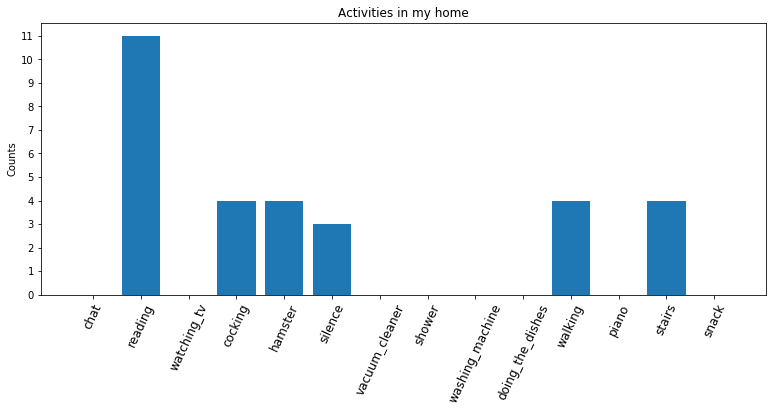

In [29]:
stats = np.zeros(num_classes)
life_log = np.zeros(len(activities)*2)

n = 0
for a in activities:
    stats[a] += 1
    life_log[n] = a
    n += 1
    
plt.figure(figsize=(13,5))
index = np.arange(num_classes)
plt.xticks(index, ds.class_labels, fontsize=12, rotation=65)
plt.bar(index, stats)
plt.ylabel('Counts')
plt.title('Activities in my home')
ax = plt.gca()
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
activities, life_log

Text(0.5,1,'Activities in my home')

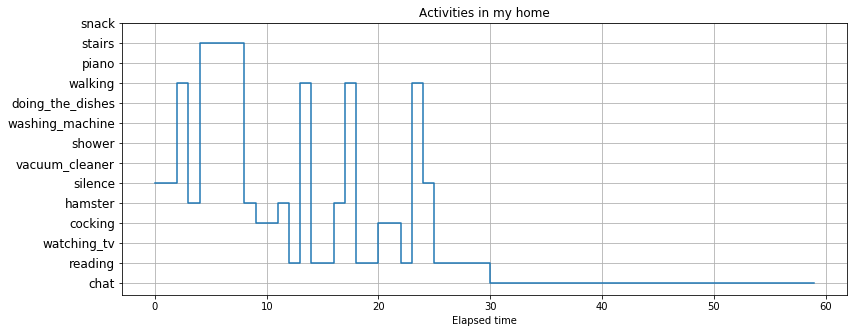

In [30]:
plt.figure(figsize=(13,5))
elapsed_time = np.arange(len(activities)*2)
plt.step(elapsed_time, life_log, where='post')
plt.yticks(index, ds.class_labels, fontsize=12)
plt.xlabel('Elapsed time')
plt.grid()
plt.title('Activities in my home')